In [28]:
import sys
sys.path.append("../")
from modules import regression_modelling, data_processing
from modules import data_plot as dt
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics

%matplotlib inline
plt.style.use('ggplot')

<p> Goals for this notebook
<dl>
    <dd>> Univariate and multivariate exploratory data analysis</dd>
    <dd>> Fill missing values with supervised learning data imputation </dd>
    <dd>> Identification and cleaning of outliers, using the z-method</dd>
    <dd>> Train the model to predict median_income which is measured in tens of thousands of US Dollars</dd>
</dl>

</p>

In [29]:
df = pd.read_csv("./data/housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [30]:
print(f"{df.shape}\n{df.isnull().sum()}")

(20640, 10)
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [31]:
#create a table of only null values and remove them in the original dataframe

null_df = df.loc[df.isna().any(axis=1)]
df = df.dropna()
null_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


<h2>Exploratory data analysis and data pre-processing<h2>

In [32]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


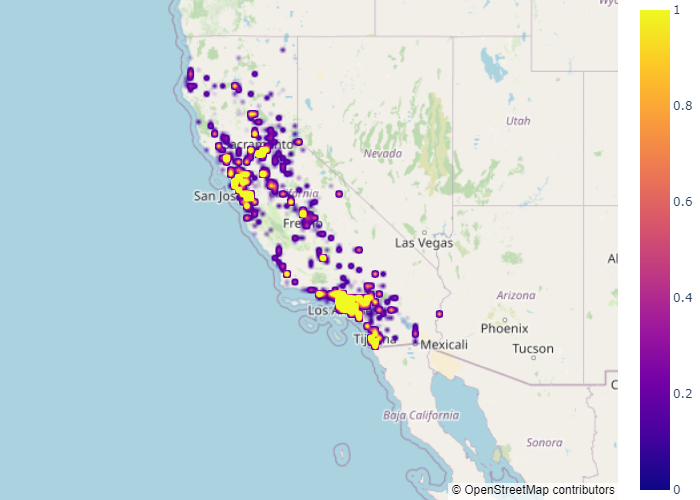

In [33]:
#this in an interactive map, github works with static pages, so that's why I put an fig.show("png"), to make it interactive just switch to fig.show()
#this interactive map can be seen in my uploaded kaggle's notebook

fig = px.density_mapbox(df, lat="latitude", lon="longitude", radius=1, mapbox_style="open-street-map", zoom = 4.2)
fig['layout'].update(margin=dict(l=0,r=0,b=0,t=0))
fig.show("png")

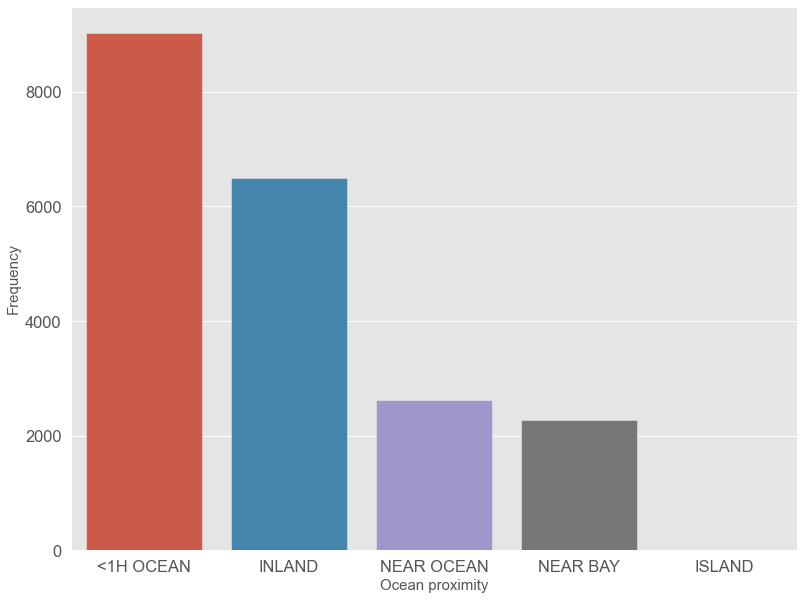

In [34]:
plt.figure(figsize=(13,10))
sns.barplot(data=df, x=df["ocean_proximity"].value_counts().index, y = df["ocean_proximity"].value_counts())
plt.xlabel('Ocean proximity', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
sns.set(font_scale=1.1)
plt.show()

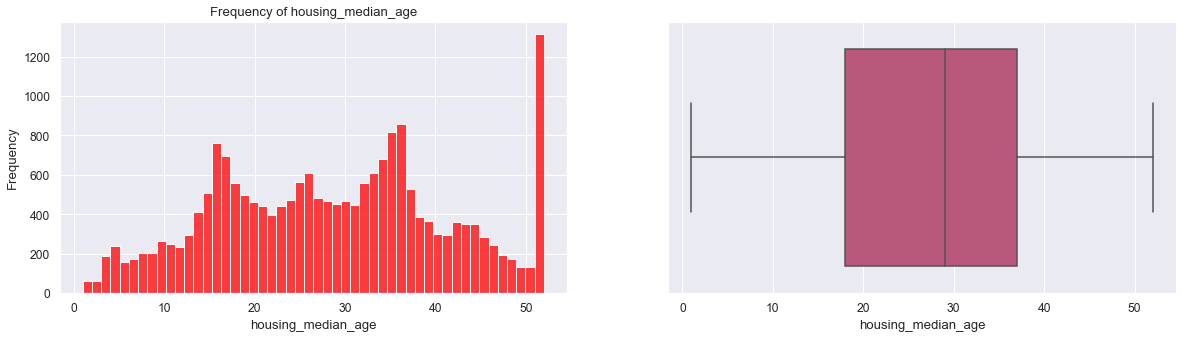

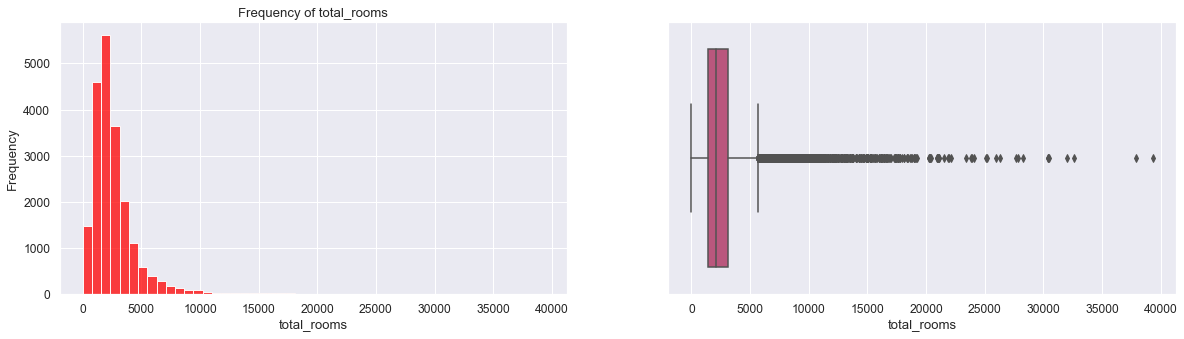

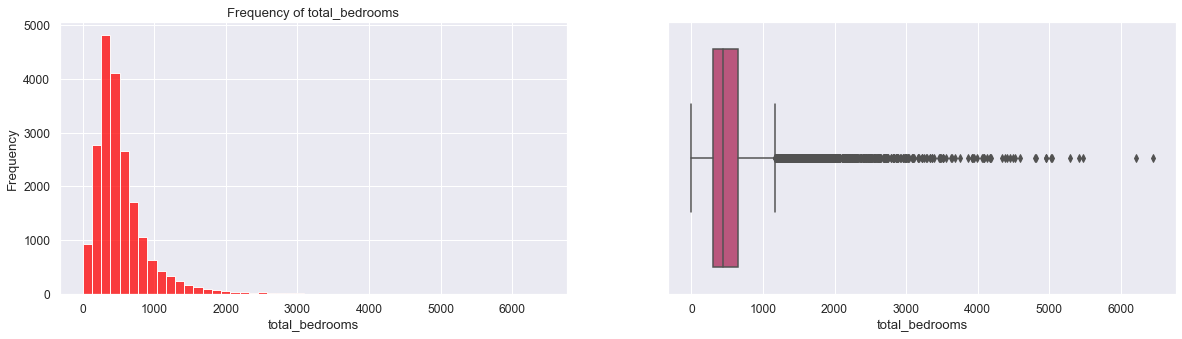

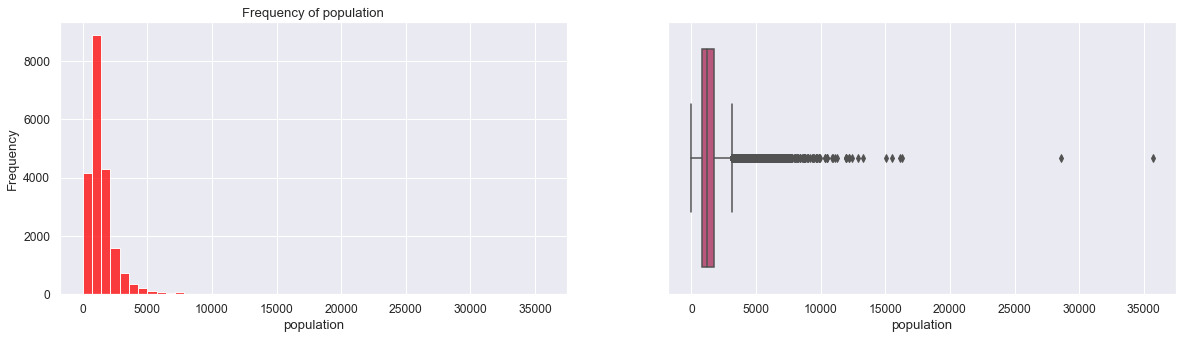

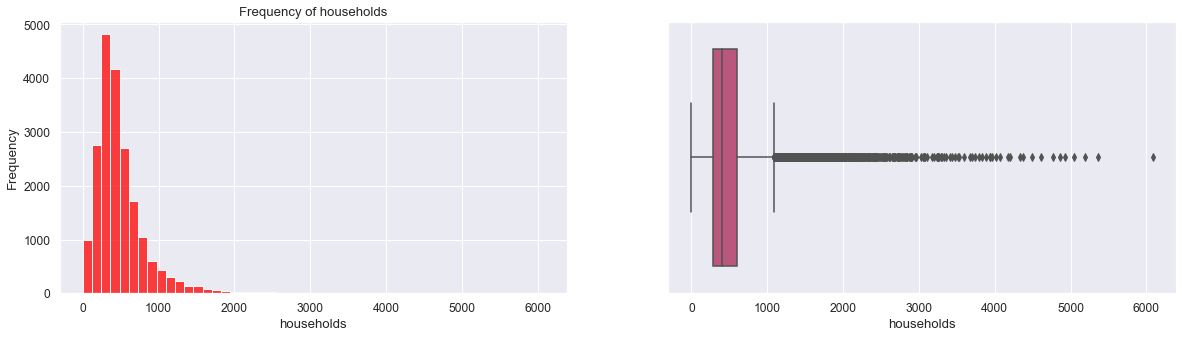

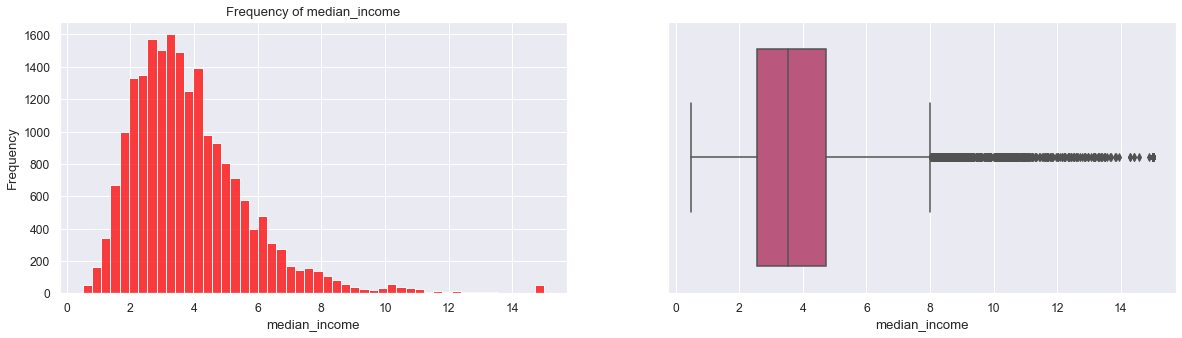

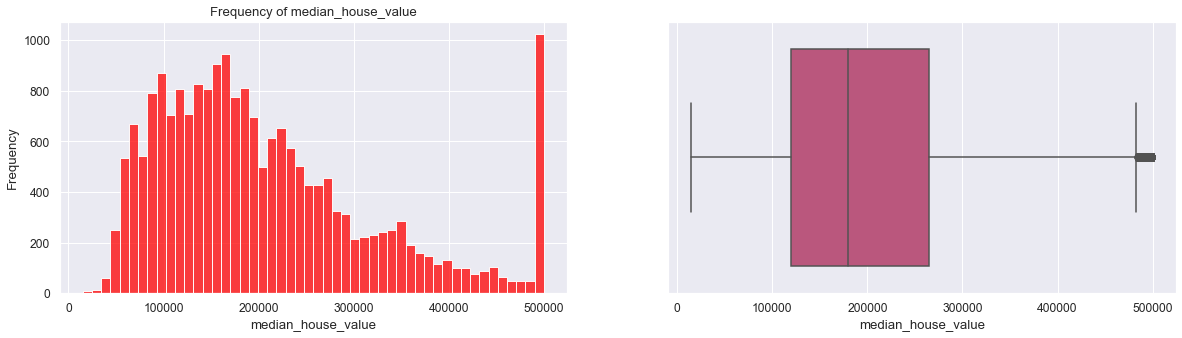

In [35]:
def plot_histogram(columns):
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.histplot(data= df, x=columns, bins=50, color="red")
    plt.ylabel("Frequency")
    plt.xlabel(columns)
    plt.title(f"Frequency of {columns}")
    plt.subplot(122)
    sns.boxplot(data=df, x=columns, palette="plasma_r")
    plt.show()

cols = ['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']    

for col in cols:
    plot_histogram(col)

As we can see that are a lot of outliers, let's create a function to remove them, the method used will be the z-score method because it deals greatly with values that goes over 3 stardard deviation out. <br>
We define Z as
$
\begin{align}
Z = \frac{x-\mu}{\sigma}
\end{align}
$
In which $\sigma$ is defined as 
$\sigma = \sqrt{\frac{\sum_{i=1}^{n}(x_i - \overline{x})^2}{n-1}} = \sqrt{\frac{\sum_{i=1}^{n}x_i^2 - n\overline{x}^2}{n-1}}$
</br>
And $\mu$ as
$\overline{x} = \frac{\sum_{i=1}^{n}x_i}{n} = \frac{x_1 + x_2 + ... + x_n}{n} $
<br>
So, this is how we detect outliers. So now for removing them we delimitate values in the range of <br>
$ 
T = \overline{x} \pm 3*\sigma 
$

In [36]:
def remove_outliers(columns):
    upper = df[columns].mean() + 3*df[columns].std()
    lower = df[columns].mean() - 3*df[columns].std()
    return df[(df[columns] < upper) & (df[columns] > lower)]

for col in cols:
    df = remove_outliers(col)

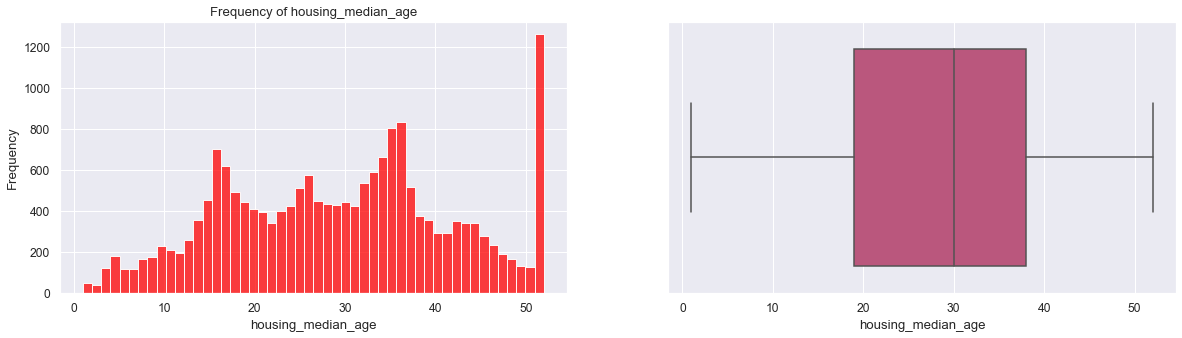

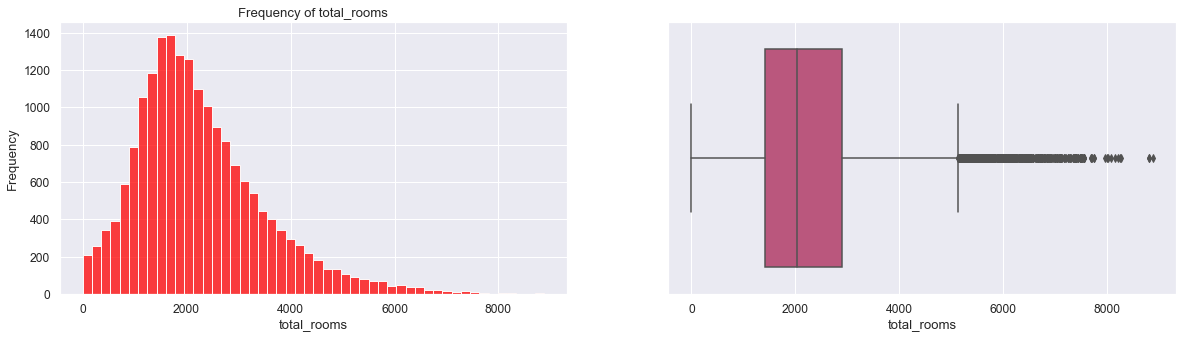

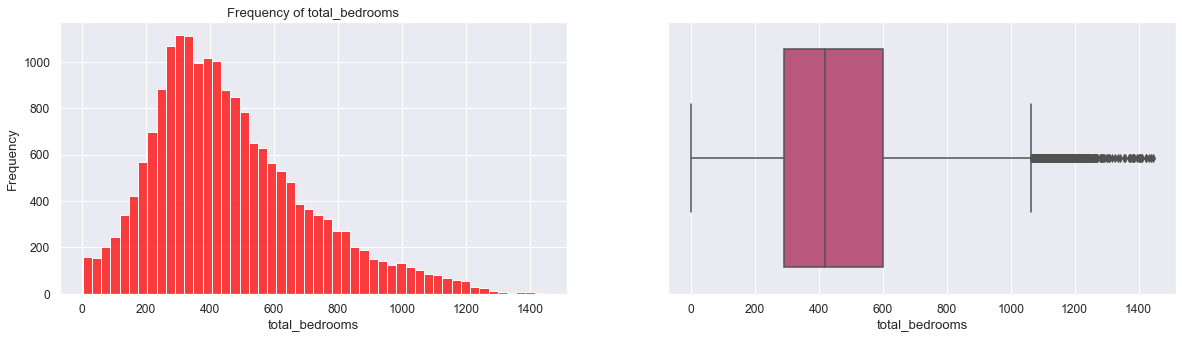

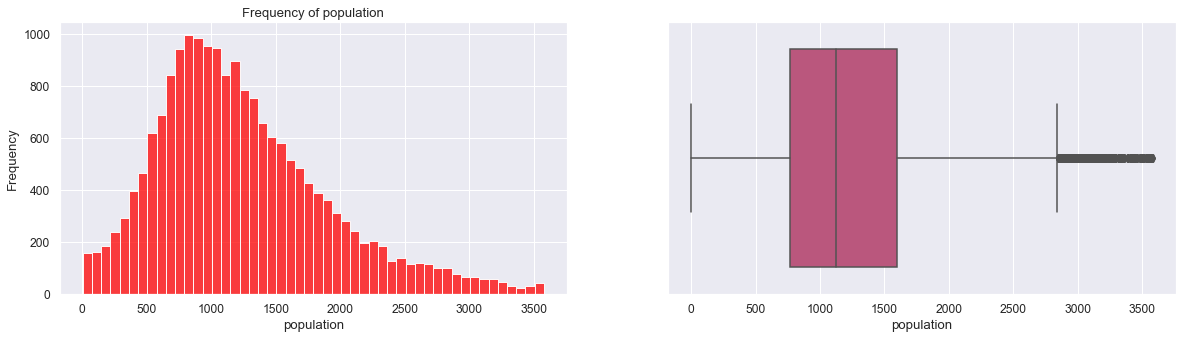

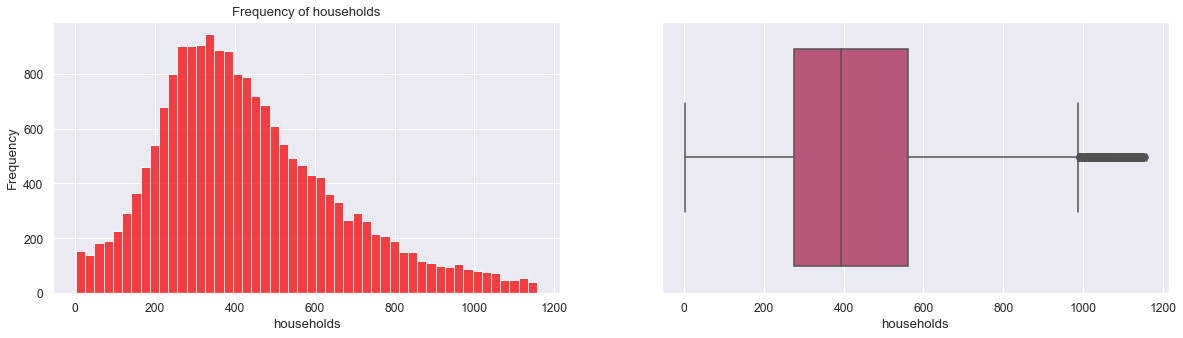

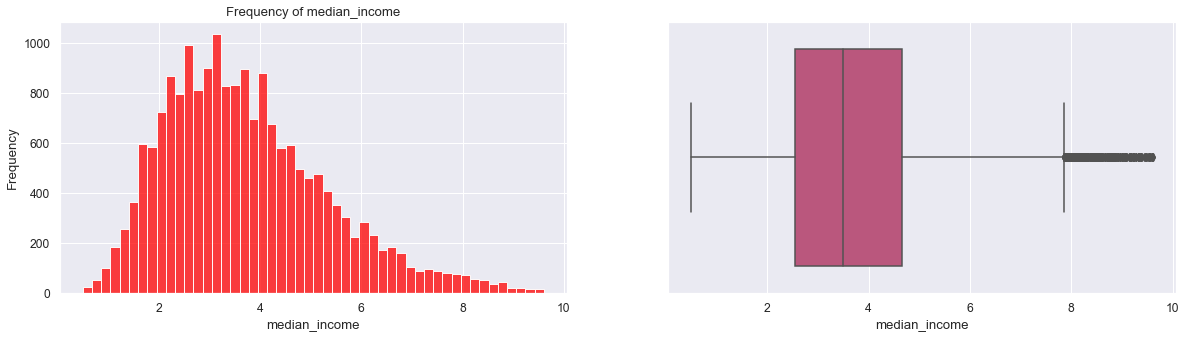

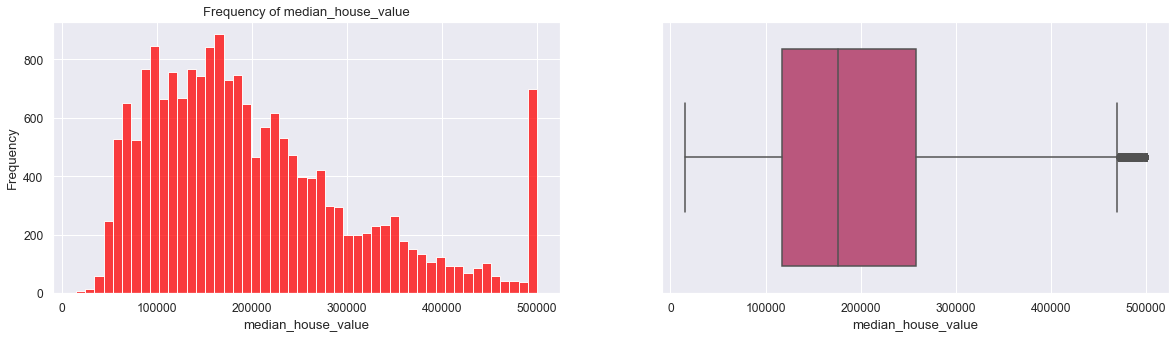

In [37]:
#lets plot everything again after removing all the outliers
for col in cols:
    plot_histogram(col)

In [38]:
sns.pairplot(df, hue = "ocean_proximity")
plt.show()

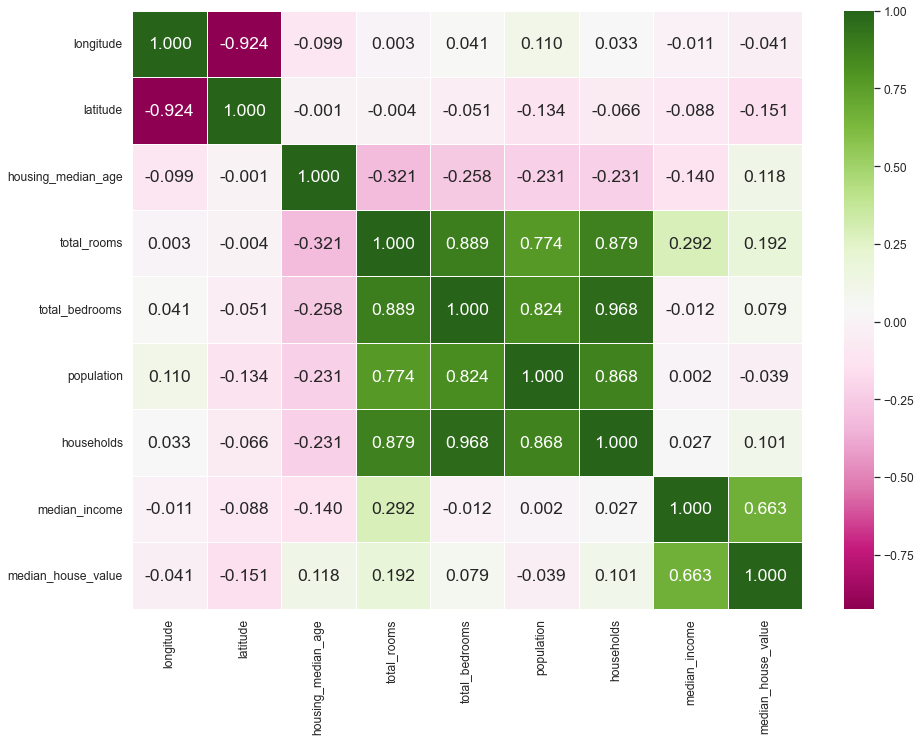

In [ ]:
plt.figure(figsize=(15,11))
sns.heatmap(df.corr(), annot=True, fmt=".3f", linewidth=.8, annot_kws={"size": 17.5}, cmap="PiYG")
sns.set(font_scale=2)
plt.show()

In [ ]:
# before progressing in the analysis, i'll fill those na's values with machine learning regression and them concatenate it in our dataframe

x_for_test = df.drop(["total_bedrooms", "ocean_proximity"], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x_for_test, df["total_bedrooms"], random_state=334441, test_size=0.25)

classifiers = [
    LinearRegression()
]
models = []

for classifier in classifiers:
    cfp = regression_modelling.classify_fit_predict(classifier, x_train, y_train, x_test)
    models.append(cfp)

print(f"{str(models[0][0])[:-2]} got scored at: {(models[0][0].score(x_test, y_test))*100:.2f}% ")

Calculating predictions for LinearRegression
LinearRegression is ready... 
Calculation finished in 0:00:00.007979
LinearRegression got scored at: 95.65% 


In [ ]:
pd.set_option('mode.chained_assignment', None)

x_fill = null_df.drop(["total_bedrooms", "ocean_proximity"], axis=1)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_fill)

append_pred = pd.DataFrame({"total_bedrooms" : y_pred})

lst = list(range(1,208))

append_pred["index"] = lst
null_df["index"] = lst

null_df = null_df.drop(["total_bedrooms"], axis=1)
null_df = null_df.merge(append_pred, on="index")
null_df = null_df.drop(["index"], axis=1)
null_df

c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



ValueError: X has 8 features, but LinearRegression is expecting 16 features as input.

In [ ]:
print(f"{df.shape}, {null_df.shape}")
full_df = pd.concat([df, null_df], ignore_index=True)
df = full_df
df

(18897, 10), (207, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.000000,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.000000,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.000000,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.000000,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.000000,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
19099,-119.19,34.20,18.0,3620.0,791.031718,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
19100,-119.18,34.19,19.0,2393.0,768.538972,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
19101,-118.88,34.17,15.0,4260.0,766.646541,1701.0,669.0,5.1033,410700.0,<1H OCEAN
19102,-118.75,34.29,17.0,5512.0,876.263500,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [ ]:
#let's try to get some new values and them calculate again the correlation so we can try to find some import insight 
df["bedrooms_per_rooms"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_households"] = df["population"] / df["households"]
df["population_per_bedrooms"] = df["population"] / df["total_bedrooms"]

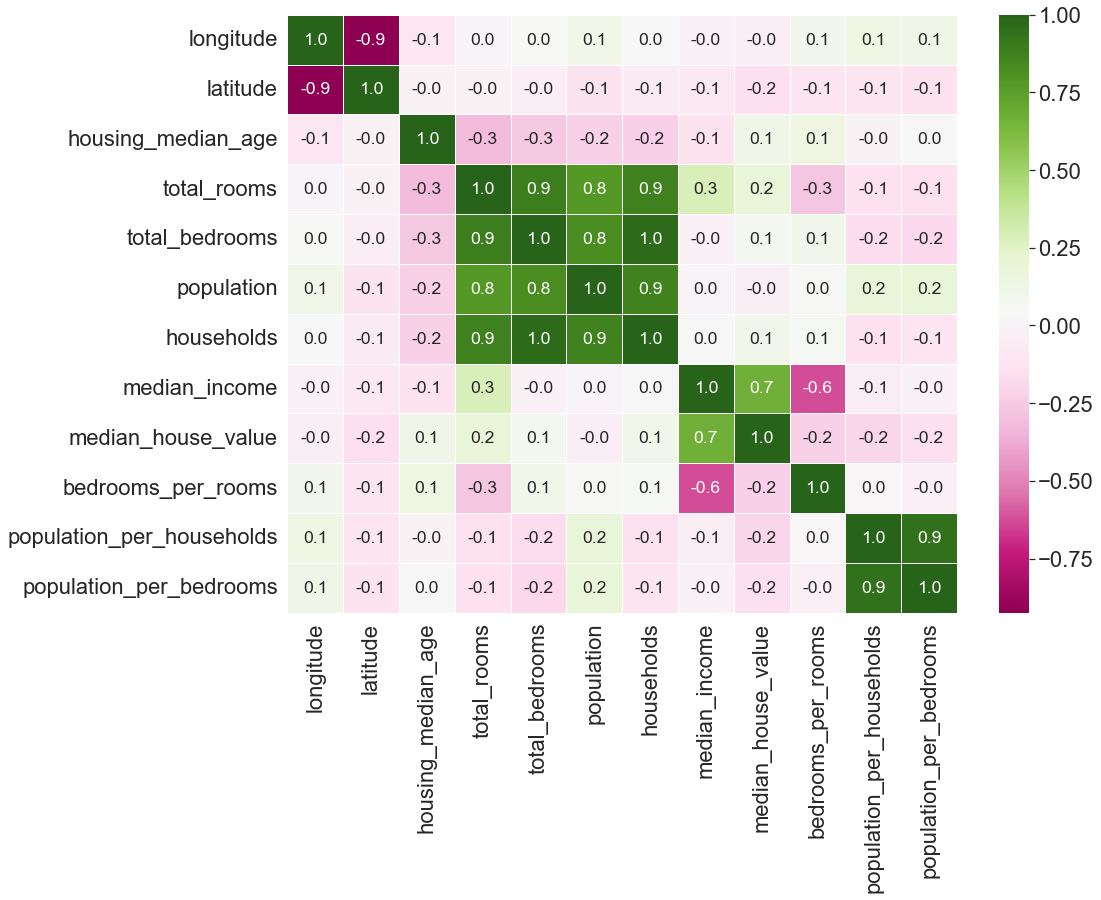

In [ ]:
plt.figure(figsize=(15,11))
sns.heatmap(df.corr(), annot=True, fmt=".1f", linewidth=.8, annot_kws={"size": 17.5}, cmap="PiYG")
sns.set(font_scale=1.5)
plt.show()

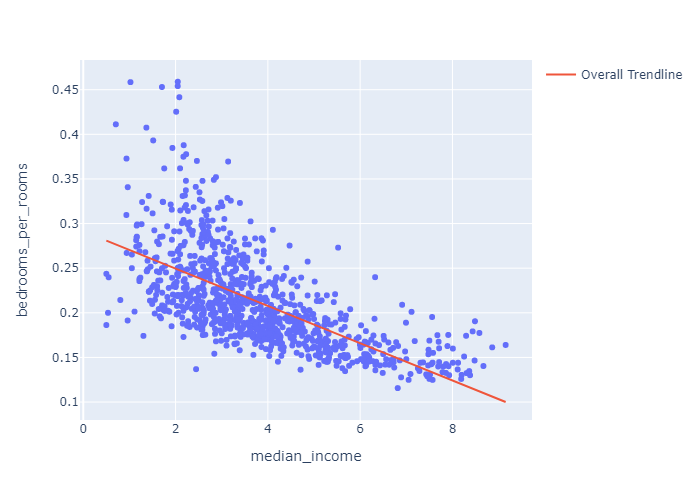

In [ ]:
five_percent_df = df.sample(n=math.floor((df.shape[0])*0.05))
fig=px.scatter(five_percent_df, x="median_income", y="bedrooms_per_rooms", trendline="ols", trendline_scope="overall")
fig.show(("png"))

In [ ]:
#let's use enconding to make ocean_proximity into binary data
#i'll use my function created in modules.data_processing

print(data_processing.automatize_enconding.__doc__)

data_processing.automatize_enconding(df, "ocean_proximity", "_")

automization of enconding to transform non-logic categorical data into binary one, the returned value will be a dummies dataframe


,__<1H OCEAN,__INLAND,__ISLAND,__NEAR BAY,__NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
19099,0,0,0,0,1
19100,0,0,0,0,1
19101,1,0,0,0,0
19102,1,0,0,0,0


In [ ]:
df = pd.concat([df, data_processing.automatize_enconding(df, "ocean_proximity", "_")], axis=1)
df = df.drop("ocean_proximity", axis=1)

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_rooms,population_per_households,population_per_bedrooms,__<1H OCEAN,__INLAND,__ISLAND,__NEAR BAY,__NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.000000,322.0,126.0,8.3252,452600.0,0.146591,2.555556,2.496124,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.000000,2401.0,1138.0,8.3014,358500.0,0.155797,2.109842,2.170886,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.000000,496.0,177.0,7.2574,352100.0,0.129516,2.802260,2.610526,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.000000,558.0,219.0,5.6431,341300.0,0.184458,2.547945,2.374468,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.000000,565.0,259.0,3.8462,342200.0,0.172096,2.181467,2.017857,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,-119.19,34.20,18.0,3620.0,791.031718,3171.0,779.0,3.3409,220500.0,0.218517,4.070603,4.008689,0,0,0,0,1
19100,-119.18,34.19,19.0,2393.0,768.538972,1938.0,762.0,1.6953,167400.0,0.321161,2.543307,2.521668,0,0,0,0,1
19101,-118.88,34.17,15.0,4260.0,766.646541,1701.0,669.0,5.1033,410700.0,0.179964,2.542601,2.218754,1,0,0,0,0
19102,-118.75,34.29,17.0,5512.0,876.263500,2734.0,814.0,6.6073,258100.0,0.158974,3.358722,3.120066,1,0,0,0,0


In [ ]:
i_df = df.drop(["longitude", "latitude", "__<1H OCEAN", "__INLAND", "__ISLAND", "__NEAR BAY", "__NEAR OCEAN", "bedrooms_per_rooms", "population_per_households", "population_per_bedrooms"], axis=1)
j_df = df.drop(["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"], axis=1)

se= StandardScaler()
standardized_df = se.fit_transform(i_df)
print(standardized_df.shape)

standardized_df = pd.DataFrame(standardized_df, columns=i_df.columns)

df = j_df.merge(standardized_df, left_index=True, right_index=True)
df

(19104, 7)


,longitude,latitude,bedrooms_per_rooms,population_per_households,population_per_bedrooms,__<1H OCEAN,__INLAND,__ISLAND,__NEAR BAY,__NEAR OCEAN,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,0.146591,2.555556,2.496124,0,0,0,1,0,0.942049,-1.104659,-1.363447,-1.373354,-1.356427,2.837417,2.259627
1,-122.22,37.86,0.155797,2.109842,2.170886,0,0,0,1,0,-0.672711,3.843374,2.602008,1.732922,3.100436,2.822708,1.412364
2,-122.24,37.85,0.129516,2.802260,2.610526,0,0,0,1,0,1.830168,-0.637624,-1.115860,-1.113377,-1.131822,2.177468,1.354739
3,-122.25,37.85,0.184458,2.547945,2.374468,0,0,0,1,0,1.830168,-0.791181,-0.933214,-1.020741,-0.946854,1.179756,1.257497
4,-122.25,37.85,0.172096,2.181467,2.017857,0,0,0,1,0,1.830168,-0.510323,-0.750567,-1.010282,-0.770693,0.069189,1.265601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,-119.19,34.20,0.218517,4.070603,4.008689,0,0,0,0,1,-0.914925,1.075371,1.323612,2.883395,1.519394,-0.243110,0.169831
19100,-119.18,34.19,0.321161,2.543307,2.521668,0,0,0,0,1,-0.834187,0.099131,1.232319,1.041145,1.444526,-1.260166,-0.308274
19101,-118.88,34.17,0.179964,2.542601,2.218754,1,0,0,0,0,-1.157140,1.584576,1.224638,0.687038,1.034953,0.846135,1.882365
19102,-118.75,34.29,0.158974,3.358722,3.120066,1,0,0,0,0,-0.995663,2.580707,1.669552,2.230464,1.673535,1.775676,0.508376


In [ ]:
x_data = df.drop("median_income", axis=1).values
y_data = df["median_income"].values

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=100, test_size=0.25)

classifiers = [
    BayesianRidge(),
    LinearRegression(),
    RandomForestRegressor()
]

models = []

for classifier in classifiers:
    cfp = regression_modelling.classify_fit_predict(classifier, x_train, y_train, x_test)
    models.append(cfp)

Calculating predictions for BayesianRidge
BayesianRidge is ready... 
Calculation finished in 0:00:00.007977
Calculating predictions for LinearRegression
LinearRegression is ready... 
Calculation finished in 0:00:00.005983
Calculating predictions for RandomForestRegressor
RandomForestRegressor is ready... 
Calculation finished in 0:00:10.268517


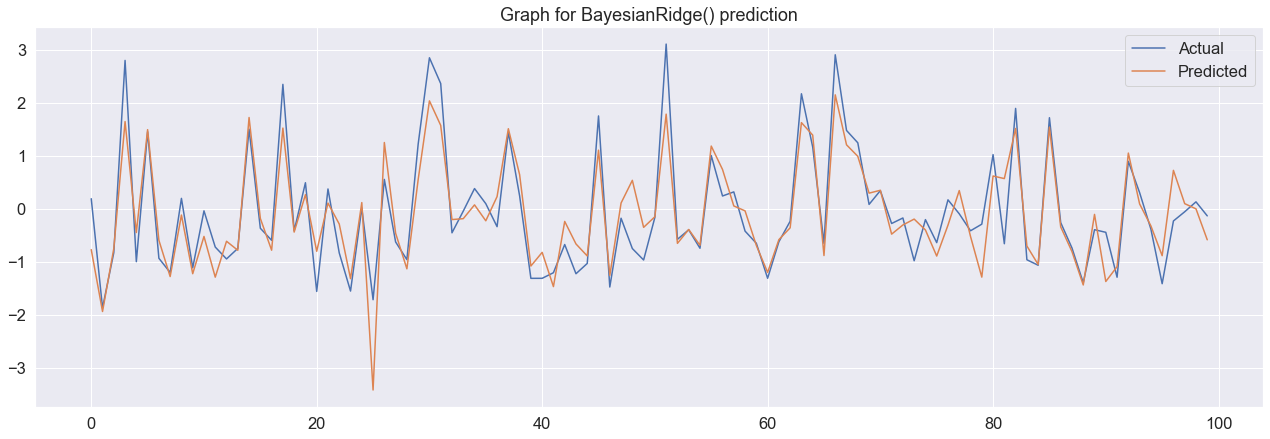

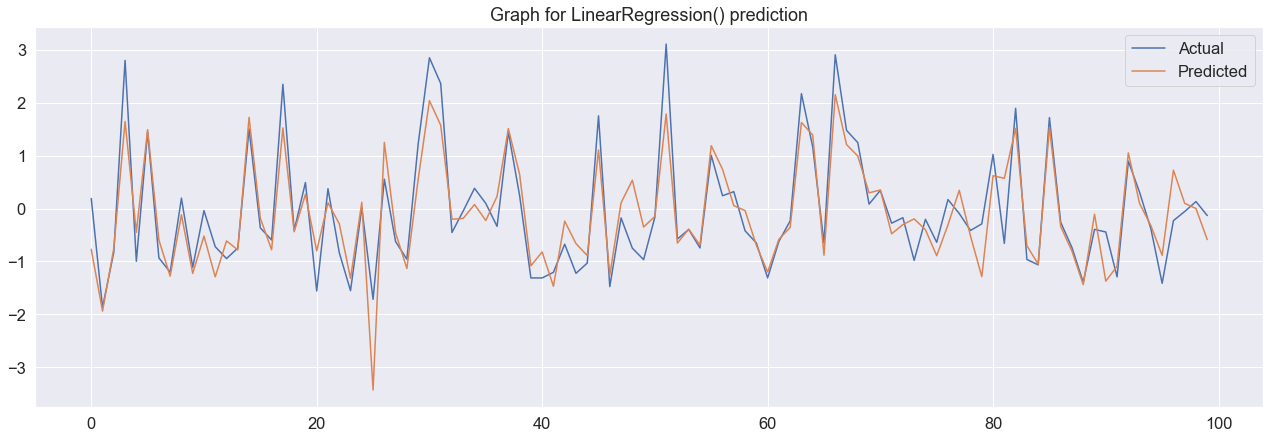

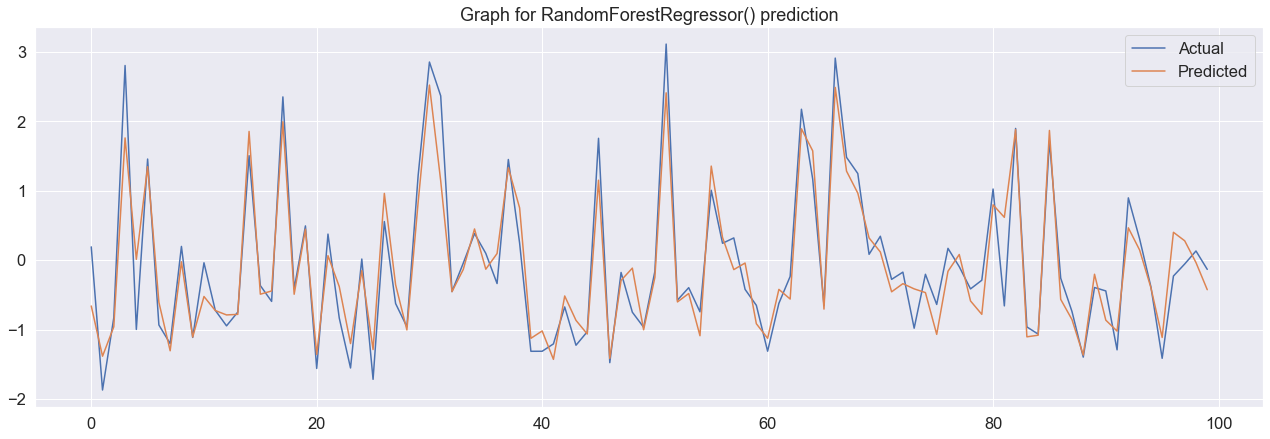

In [ ]:
def plot_actual_predicted():
    for i in range(len(models)):
        actual_predicted = pd.DataFrame({"Y_test": y_test , "Y_pred" : models[i][1]})
        plt.figure(figsize=(22,7))
        plt.plot(actual_predicted[:100])
        plt.legend(["Actual" , "Predicted"])
        plt.title(f"Graph for {models[i][0]} prediction")

plot_actual_predicted()

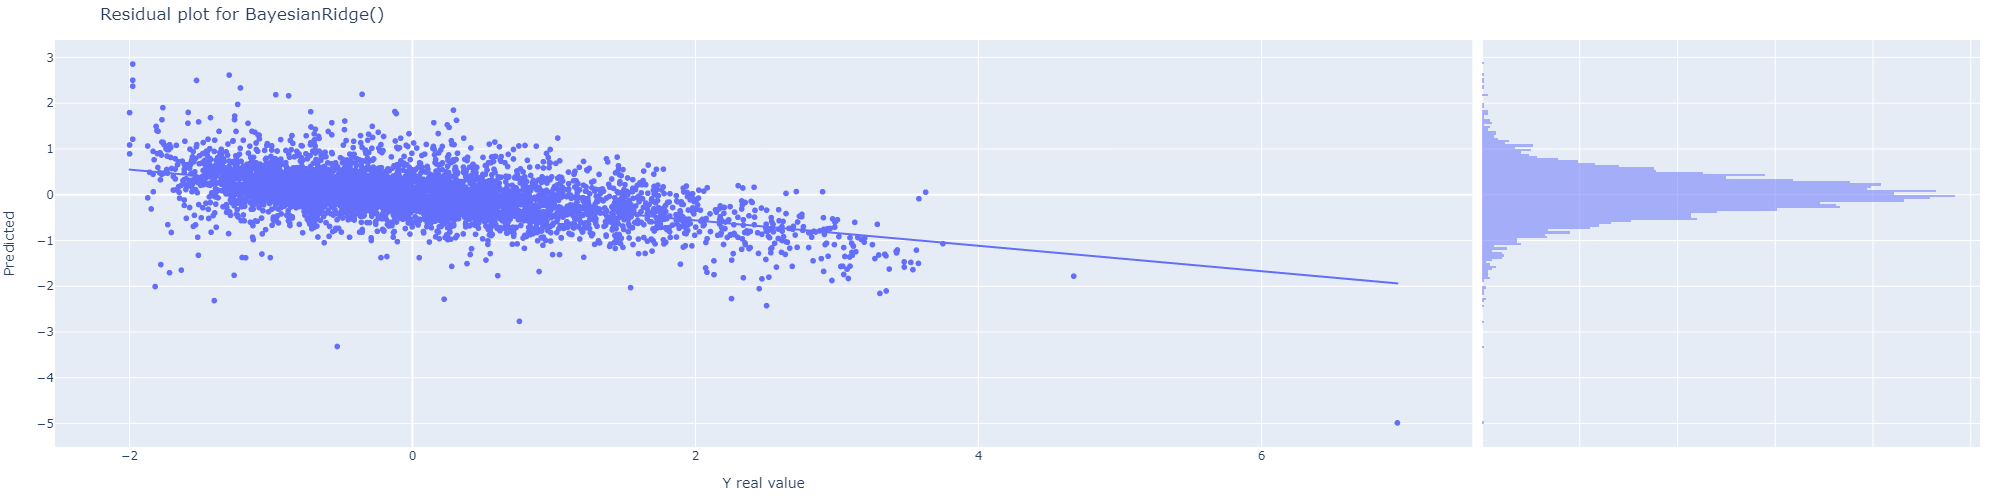

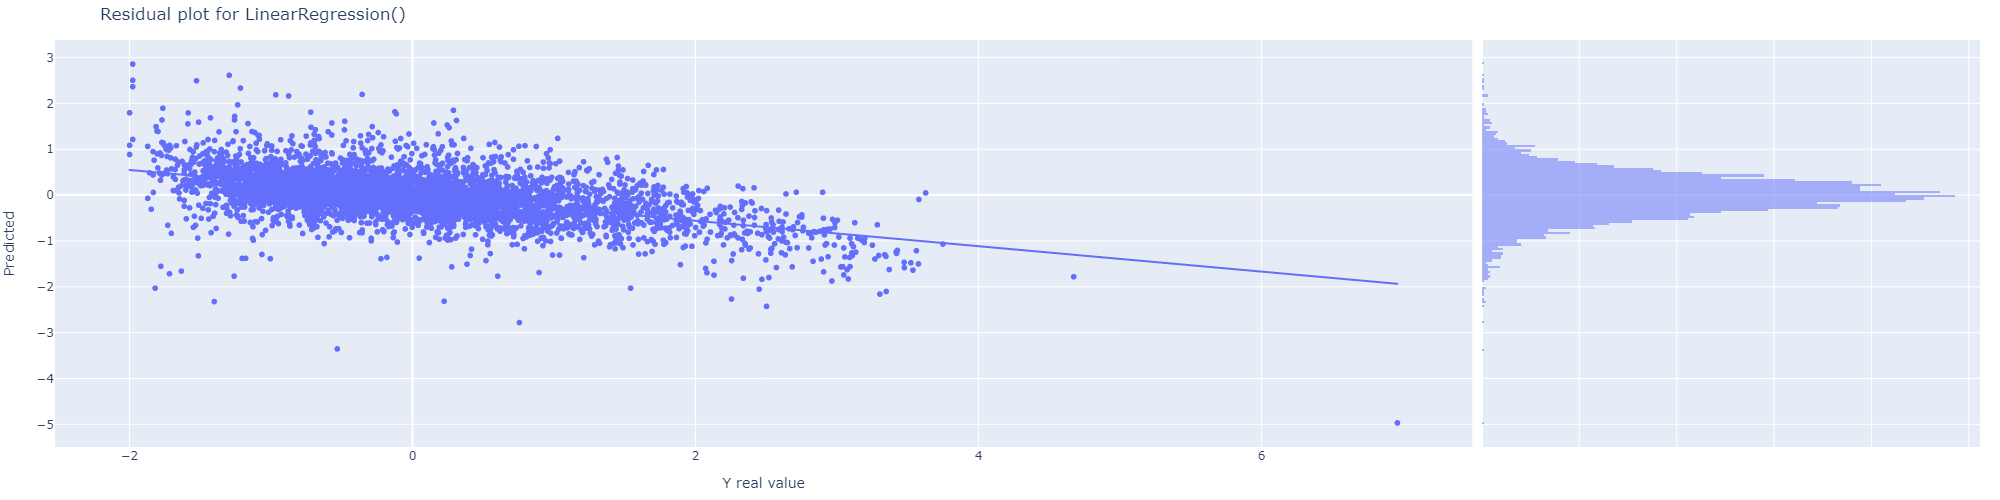

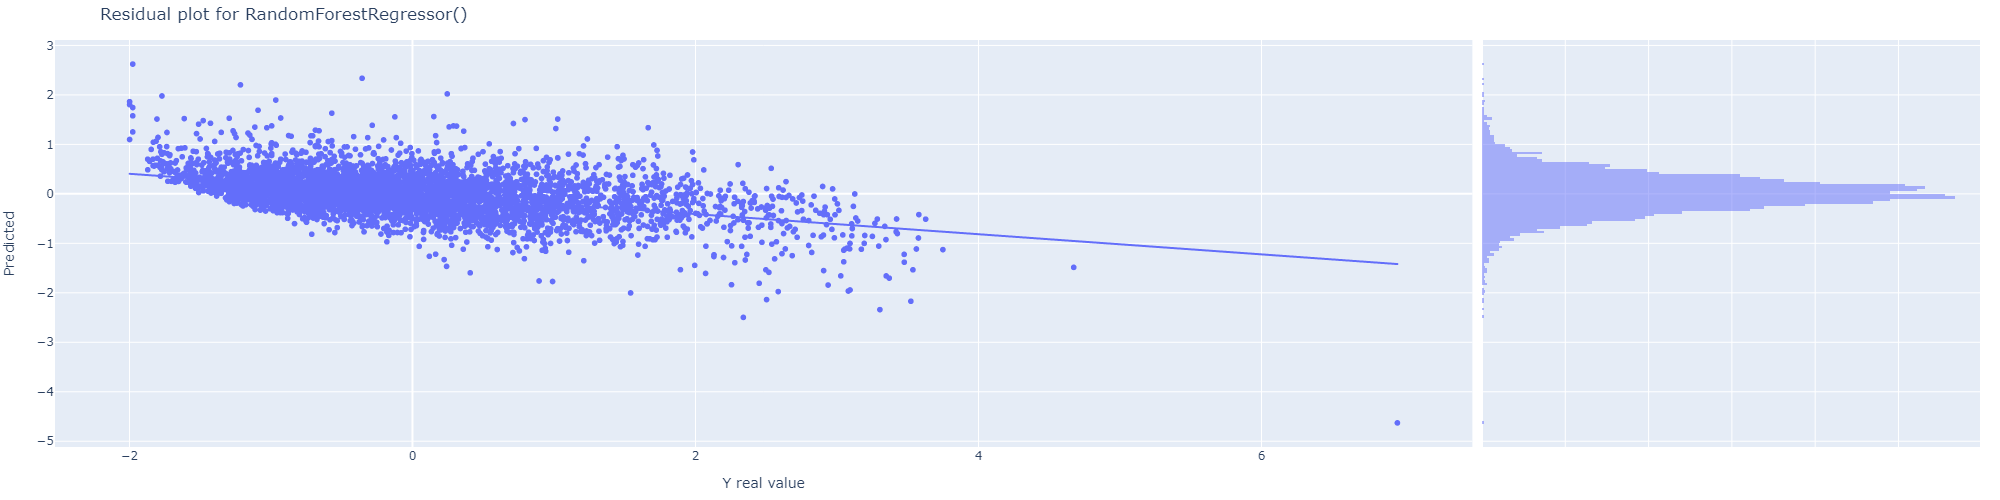

In [ ]:

def plot_residuals():
    for i in range(len(models)):
        actual_predicted = pd.DataFrame({"Y_test": y_test , "Y_pred" : models[i][1]})
        actual_predicted['residual'] = actual_predicted['Y_pred'] - actual_predicted['Y_test']
        fig = px.scatter(
            actual_predicted, x='Y_test', y='residual', title=f"Residual plot for {models[i][0]}", 
            marginal_y='histogram', 
            trendline='ols'
        )
        fig.update_layout(
        xaxis_title="Y real value", yaxis_title="Predicted",
        width=2000,
        height=500,
        margin=dict(l=20, r=20, t=40, b=20),
    )

        fig.show("png")

plot_residuals()

In [ ]:
for i in range(len(models)):
    mae = metrics.mean_absolute_error(models[i][1], y_test)
    mse = metrics.mean_squared_error(models[i][1], y_test)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(models[i][1],y_test)

    print(f"{str(models[i][0])[:-2]} got scored at: {(models[i][0].score(x_test, y_test))*100:.2f}% ")
    print("Results of sklearn.metrics:")
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)
    print("\n")

BayesianRidge got scored at: 73.46% 
Results of sklearn.metrics:
MAE: 0.38240644737059254
MSE: 0.2707196523314073
RMSE: 0.5203072672290935
R-Squared: 0.6265099947506902


LinearRegression got scored at: 73.46% 
Results of sklearn.metrics:
MAE: 0.38232840544166985
MSE: 0.2707128187091312
RMSE: 0.5203007002773792
R-Squared: 0.6268836337852017


RandomForestRegressor got scored at: 81.15% 
Results of sklearn.metrics:
MAE: 0.31921454574278413
MSE: 0.1922269266784297
RMSE: 0.43843691299710347
R-Squared: 0.7588154117904339




In conclusion, the best regressor was the random forest scoring a Mean square error (MSE) of 0.16, which is pretty good, as well as, getting a really good residual plot, the histogram of the side shows a low variance normal distribuition, which fits great with the analysis. Another good metric was R², a good R² implies that the dependent variable "median_income" is explained by all independent variables in the dataset. 